In [1]:
import pandas as pd
import numpy as np
from mplsoccer import PyPizza, add_image
import matplotlib.pyplot as plt
from PIL import Image

In [20]:
logo = Image.open('Digi skills.png') 

In [17]:
df = pd.read_excel('test pizza plot.xlsx', sheet_name="Feuil3")

In [18]:
df

,params,"Browsing, searching and filtering data",Evaluation data,Managing data,Developing digital content,Re-elaborating content,Copyright and licences,Programming,Protecting devices,Protecting personal data and privacy,Protecting health and well-being,Protecting the environment,Solving technical problems,Identifying needs and technological responses,Creatively using digital technologies,Identifying digital competence gaps
0,repondant 1,75,75,65,90,65,65,65,65,40,50,65,50,65,65,75


In [5]:
digicom = ['Browsing,\nsearching and\nfiltering data', 'Evaluation data', 'Managing data',
          'Developing\ndigital\ncontent', 'Re-elaborating\ncontent', 'Copyright\nand licences', 'Programming',
          'Protecting devices', 'Protecting personal\ndata and privacy', 'Protecting health\nand well-being', 
            'Protecting\nthe environment',
          'Solving\ntechnical problems', 'Identifying\nneeds and\ntechnological\nresponses', 
           'Creatively using\ndigital technologies', 'Identifying digital\ncompetence gaps']

In [6]:
digicom

['Browsing,\nsearching and\nfiltering data',
 'Evaluation data',
 'Managing data',
 'Developing\ndigital\ncontent',
 'Re-elaborating\ncontent',
 'Copyright\nand licences',
 'Programming',
 'Protecting devices',
 'Protecting personal\ndata and privacy',
 'Protecting health\nand well-being',
 'Protecting\nthe environment',
 'Solving\ntechnical problems',
 'Identifying\nneeds and\ntechnological\nresponses',
 'Creatively using\ndigital technologies',
 'Identifying digital\ncompetence gaps']

In [7]:
repondant01 = list(df.loc[0])
repondant01 = repondant01[1:]
repondant01

[75, 75, 65, 90, 65, 65, 65, 65, 40, 50, 65, 50, 65, 65, 75]

In [13]:
print(len(digicom),len(repondant01))

15 15


In [10]:
score_data_litracy = round(np.mean(repondant01[0:3]))
score_Digital_content_creation = round(np.mean(repondant01[3:7]))
score_safety = round(np.mean(repondant01[7:11]))
score_problem_solving = round(np.mean(repondant01[11:15]))

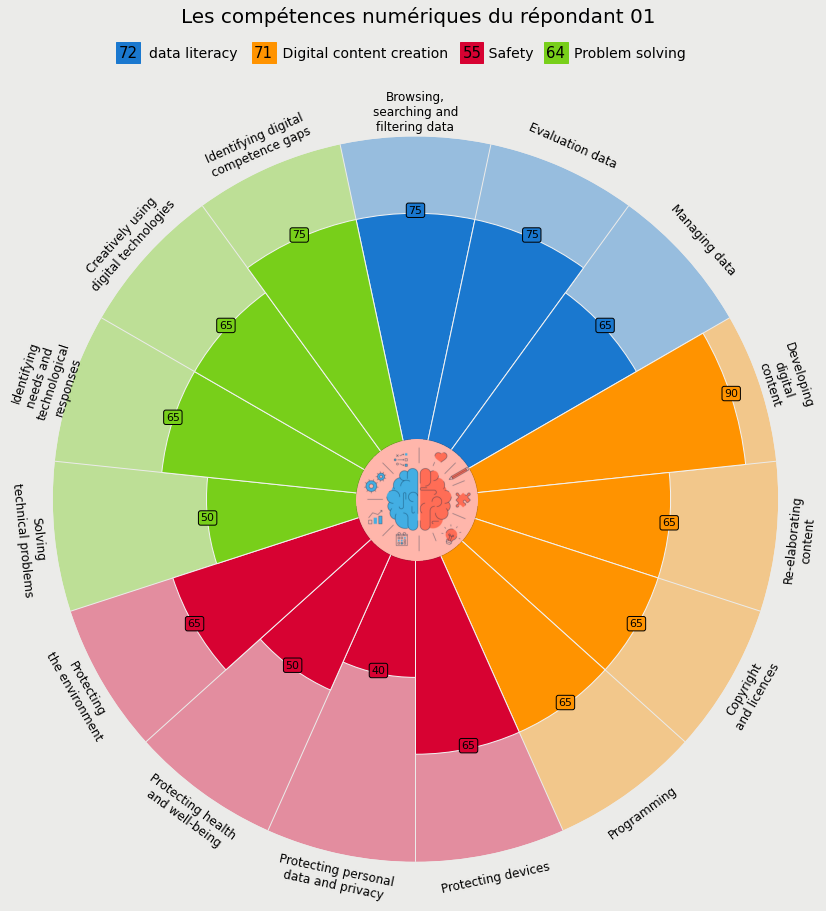

In [14]:
# color for the slices and text
slice_colors = ["#1A78CF"] * 3 + ["#FF9300"] *4  + ["#D70232"] * 4 + ["#78cf1a"] * 4 
text_colors = ["#000000"] * 15 

# instantiate PyPizza class
baker = PyPizza(
    params=digicom,                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=18           # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    repondant01,                          # list of values
    figsize=(13, 14),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=12,
        va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.975, "Les compétences numériques du répondant 01", size=20,
    ha="center", color="#000000"
)

# add text
fig.text(
    0.515, 0.940, "data literacy          Digital content creation         Safety         Problem solving", size=14,
    ha="center", color="#000000"
)

fig.text(
    0.195, 0.940, score_data_litracy, size=15,
    color="#000000")
fig.text(
    0.34, 0.940, score_Digital_content_creation, size=15,
    color="#000000")
fig.text(
    0.563, 0.940, score_safety, size=15,
    color="#000000")
fig.text(
    0.652, 0.940, score_problem_solving, size=15,
    color="#000000")


# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.193, 0.935), 0.025, 0.021, fill=True, color="#1A78CF",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.338, 0.935), 0.025, 0.021, fill=True, color="#FF9300",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.56, 0.935), 0.025, 0.021, fill=True, color="#D70232",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.65, 0.935), 0.025, 0.021, fill=True, color="#78cf1a",
        transform=fig.transFigure, figure=fig
    ),
])


# add image
ax_image = add_image(
    logo, fig, left=0.449, bottom=0.4315, width=0.13, height=0.14
)   # these values might differ when you are plotting

plt.show()


In [21]:
fig.savefig("P_Viz.png")